# Proyecto Regrsion Lineal Demografica


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import missingno as msno
from itertools import product
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, recall_score
from sklearn.feature_selection import f_classif, SelectKBest, RFE

In [43]:
# Cargamos el data set
ruta = r"C:\Users\Alia\Documents\GitHub\Proyectos de clase\Proyecto Regresion lineal demografico\aliasys-machine-probability\data\raw\demographic_health_data.csv"
df = pd.read_csv(ruta, sep=",")

In [44]:
df.head(5)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


## Observaciones:
 - Elegi la variable ['Obesity_prevalence'], pues tiene una prevalencia de la obesidad en la poblacion. Es muy util para estudiar factores asociados a la obesidad y condiciones de salud relacionadas.

In [97]:
df['Obesity_prevalence'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3140 entries, 0 to 3139
Series name: Obesity_prevalence
Non-Null Count  Dtype  
--------------  -----  
3140 non-null   float64
dtypes: float64(1)
memory usage: 24.7 KB


In [98]:
df['Obesity_prevalence'].describe()

count    3140.000000
mean       35.019299
std         4.517088
min        15.200000
25%        32.400000
50%        35.400000
75%        37.900000
max        49.900000
Name: Obesity_prevalence, dtype: float64

In [106]:
df['Obesity_prevalence'].isnull().sum()

np.int64(0)

 - Analizamos el EDA con la variable objetivo ['Obesity_prevalence']

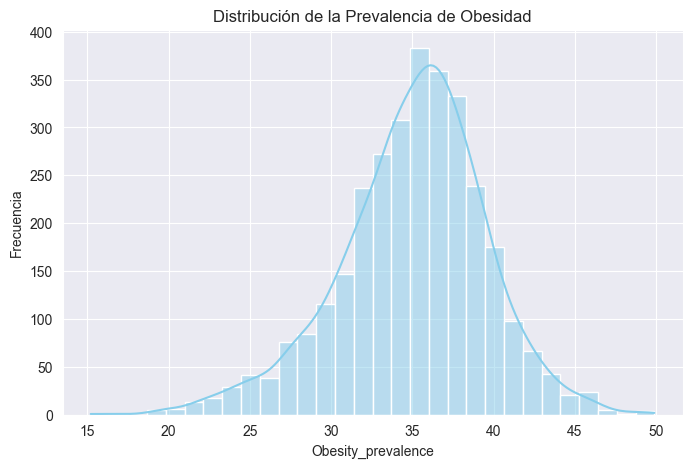

In [100]:
# Histograma
plt.figure(figsize=(8, 5))
sns.histplot(df['Obesity_prevalence'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de la Prevalencia de Obesidad')
plt.xlabel('Obesity_prevalence')
plt.ylabel('Frecuencia')
plt.show()

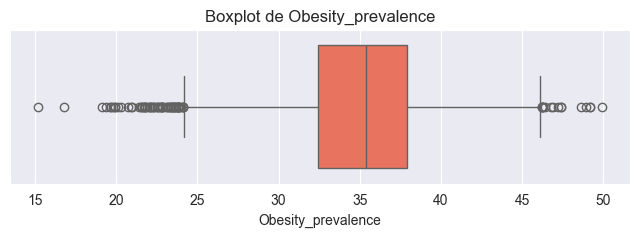

In [101]:
# Boxplot para identificar outliers
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['Obesity_prevalence'], color='tomato')
plt.title('Boxplot de Obesity_prevalence')
plt.show()

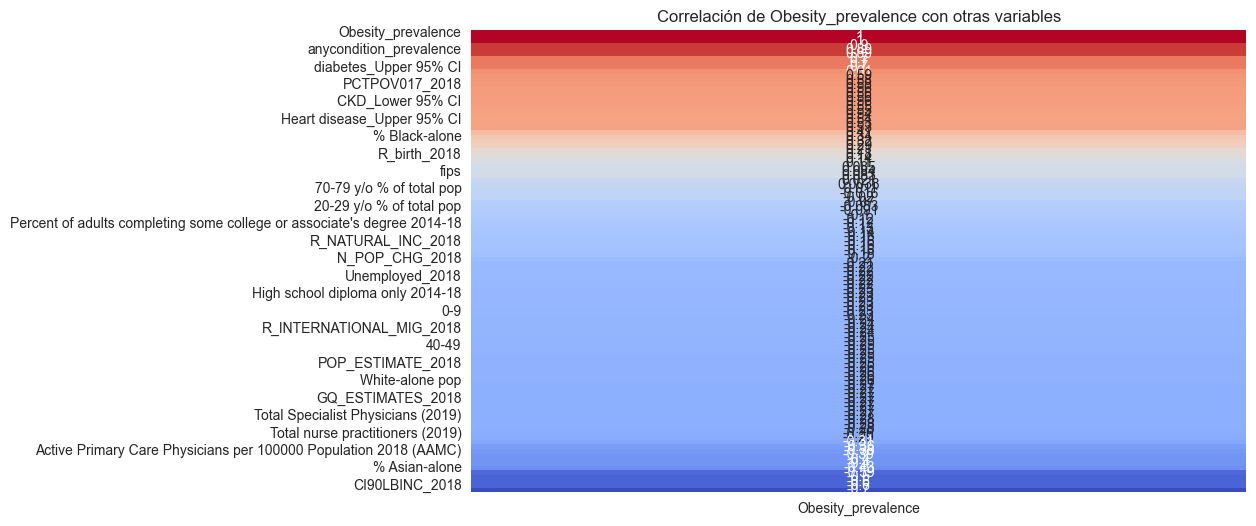

In [102]:
# Correlación con otras variables numéricas
corr = df.corr(numeric_only=True)
if 'Obesity_prevalence' in corr.columns:
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr[['Obesity_prevalence']].sort_values(by='Obesity_prevalence', ascending=False),
                annot=True, cmap='coolwarm', cbar=False)
    plt.title('Correlación de Obesity_prevalence con otras variables')
    plt.show()


In [108]:
# Comparación por país si hay columna 'Country'
if 'Country' in df.columns:
    top_countries = df.groupby('Country')['Obesity_prevalence'].mean().sort_values(ascending=False).head(10)
    plt.figure()
    sns.barplot(x=top_countries.values, y=top_countries.index, palette='Reds_r')
    plt.title('Top 10 países por Obesity_prevalence promedio')
    plt.xlabel('Obesity_prevalence promedio')
    plt.ylabel('País')
    plt.show()

In [107]:
# Línea temporal si hay una columna de 'Year'
if 'Year' in df.columns:
    plt.figure()
    sns.lineplot(data=df, x='Year', y='Obesity_prevalence')
    plt.title('Tendencia temporal de Obesity_prevalence')
    plt.xlabel('Año')
    plt.ylabel('Obesity_prevalence')
    plt.show()